In [ ]:
#%pip install --upgrade --force-reinstall opencv-python -q
#%pip install --upgrade tensorflow -v --use-deprecated=legacy-resolver
#%pip install --upgrade --force-reinstall -v tensorflow==2.15
#%pip install --upgrade pillow -q --use-deprecated=legacy-resolver
#%pip install --upgrade keras -q --use-deprecated=legacy-resolver
#%pip install --upgrade tensorflow_datasets -q
#%pip install --upgrade tfds-nightly
#%pip install --force-reinstall -v protobuf==3.20.3

In [104]:
from zipfile import ZipFile
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow.compat.v1 as tf
import tensorflow_datasets as td
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import SeparableConv2D,Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import time

In [ ]:
tf.compat.v1.enable_eager_execution()


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [55]:
width = 30
height = 30
batch_size = 128

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip = ZipFile('drive/MyDrive/data/archive (1).zip')
zip.extractall('data')

---

In [6]:
import shutil
shutil.copytree('data/test', 'data/train', dirs_exist_ok=True)

'data/train'

In [56]:
dataset_builder = td.ImageFolder(root_dir='./data', shape=(64, 64, 1))
train = dataset_builder.as_dataset(split='train', shuffle_files=True, batch_size=batch_size, as_supervised=True)
test = dataset_builder.as_dataset(split='val', shuffle_files=True, batch_size=batch_size, as_supervised=True)

---

In [59]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (height, width))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [60]:
train = train.map(preprocess_image)
test = test.map(preprocess_image)

In [61]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(height, width, 1), padding="same"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(rate=0.1))
model.add(Flatten())
model.add(Dense(15, activation='tanh'))
model.add(Dropout(rate=0.1))
model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 30)        300       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 30)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 10, 10, 30)        0         
                                                                 
 flatten_4 (Flatten)         (None, 3000)              0         
                                                                 
 dense_10 (Dense)            (None, 15)                45015     
                                                                 
 dropout_14 (Dropout)        (None, 15)                0         
                                                      

---

In [25]:
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (4,4),padding = 'Same', activation='relu',input_shape=(height, width, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (4,4),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

model.add(GlobalAveragePooling2D())

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6,activation='softmax'))

In [62]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
from keras.callbacks import ModelCheckpoint

epochs = 50

checkpoint_filepath = 'models/model.{epoch:02d}-{val_accuracy:.4f}.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train,
                    epochs=epochs,
                    validation_data=test,
                    callbacks=[model_checkpoint_callback])

Epoch 1/50
415/415 [==============================] - 31s 75ms/step - loss: 5.2859e-04 - accuracy: 0.9999 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 2/50
415/415 [==============================] - 32s 76ms/step - loss: 4.2346e-04 - accuracy: 0.9999 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 3/50
415/415 [==============================] - 33s 80ms/step - loss: 5.6603e-04 - accuracy: 0.9998 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 4/50
415/415 [==============================] - 31s 75ms/step - loss: 6.7147e-04 - accuracy: 0.9998 - val_loss: 0.0023 - val_accuracy: 0.9993
Epoch 5/50
415/415 [==============================] - 31s 75ms/step - loss: 3.7896e-04 - accuracy: 0.9999 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 6/50
415/415 [==============================] - 31s 74ms/step - loss: 7.7433e-04 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 7/50
415/415 [==============================] - 31s 74ms/step - loss: 3.3967e-04 - accuracy: 0.9999 - val_

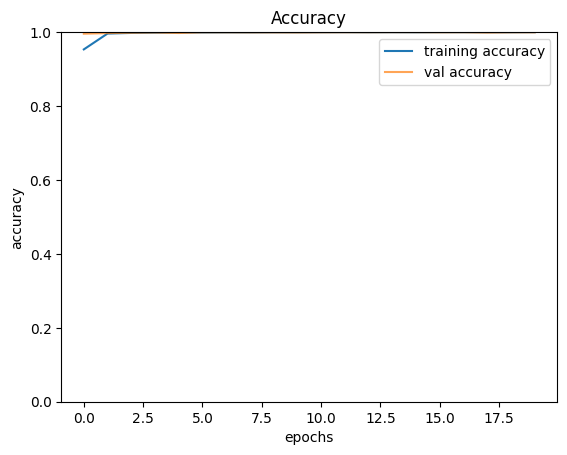

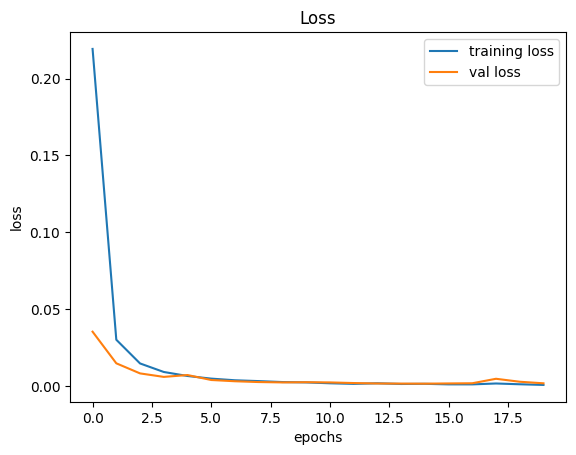

In [49]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy', alpha=0.7)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [71]:
from keras.models import load_model
model = model = load_model('models/model.03-0.9998.h5')

In [80]:
start = time()
_, acc = model.evaluate(test)
end = time()
print(f'Accuracy: {acc:.2%}')
print(f'Evaluated in {end - start:.4f} s.')

47/47 [==============================] - 1s 26ms/step - loss: 0.0019 - accuracy: 0.9998
Accuracy: 99.98%
Evaluated in 1.2837 s.


In [134]:
from keras.backend import set_learning_phase
set_learning_phase(0)

start = time()
model.predict(test)
end = time()
print(f'Evaluated in {end - start:.4f} s.')

47/47 [==============================] - 1s 25ms/step
Evaluated in 1.2360 s.
